In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random 
import os

In [ ]:
df = pd.read_csv ( "https://opendata.arcgis.com/datasets/798b84abd9aa4116896434a3ac85457c_0.csv", index_col= 0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
df

,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,ZIPCode
OBJECTID,,,,,,,,,,,,,,,,,,
1,8285810,10CC9DA95F732422,2020/09/29 08:10:00,Low,ND,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,NaN,21209.0
2,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00,Low,SD,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,NaN,21230.0
3,8286082,10CC9DA95F733855,2020/09/29 09:36:00,Low,NE,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,NaN,21218.0
4,8290068,10CC9DA95F748561,2020/09/30 09:17:00,Low,SE,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,NaN,21224.0
5,8290067,10CC9DA95F748784,2020/09/30 09:26:00,Low,WD,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,NaN,21216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465126,8699998,FCC9DA95FEDF022,2020/12/31 10:37:00,Medium,NE,BURGLARY,P203662055,1700 LAKESIDE AV,1700 LAKESIDE AV BALTIMORE MD,Ednor Gardens-Lakeside,Northeastern,412.0,14.0,D4,Northwood,Census Tract 902,NaN,21218.0
1465127,8700237,FCC9DA95FEE0A32,2020/12/31 12:27:59,Medium,SD,NARCOTICS,P203662471,200 WARREN AV,200 WARREN AV BALTIMORE MD,Federal Hill,Southern,942.0,11.0,D7,Inner Harbor/Federal Hill,Census Tract 2403,NaN,21230.0
1465128,8700611,FCC9DA95FEE1C12,2020/12/31 13:44:00,Low,SW,HIT AND RUN,P203662755,800 COOKS LN,800 COOKS LN BALTIMORE MD,West Hills,Southwestern,823.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2804.01,NaN,21229.0


In [ ]:
import nltk
from nltk.corpus import words
from nltk.metrics.distance import (
    edit_distance,
    jaccard_distance,
    )
from nltk.util import ngrams
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
correct_spellings = words.words()
spellings_series = pd.Series(correct_spellings)
spellings_series

0                 A
1                 a
2                aa
3               aal
4             aalii
            ...    
236731       yellow
236732          yes
236733    yesterday
236734          you
236735        young
Length: 236736, dtype: object

In [ ]:
def jaccard(entries, gram_number):
    
    outcomes = []
    for entry in entries: #iteratively for loop
        spellings = spellings_series[spellings_series.str.startswith(entry[0])] 
        distances = ((jaccard_distance(set(ngrams(entry, gram_number)),
                                       set(ngrams(word, gram_number))), word)
                     for word in spellings)
        closest = min(distances)
        outcomes.append(closest[1])
    return outcomes

In [ ]:
def JDreco(entries=['cormulent', 'incendenece', 'validrate']):
    """finds the closest word based on jaccard distance"""
    return jaccard(entries, 3)

In [ ]:
df.isnull().sum()

recordId                             0
callKey                              0
callDateTime                         0
priority                             2
district                             0
description                          0
callNumber                           0
incidentLocation                     1
location                             0
Neighborhood                     22878
PoliceDistrict                   22803
PolicePost                       22803
CouncilDistrict                  22762
SheriffDistricts                 22801
Community_Statistical_Areas      23308
Census_Tracts                    22813
VRIZones                       1233043
ZIPCode                          23834
dtype: int64

In [ ]:
import missingno as msno

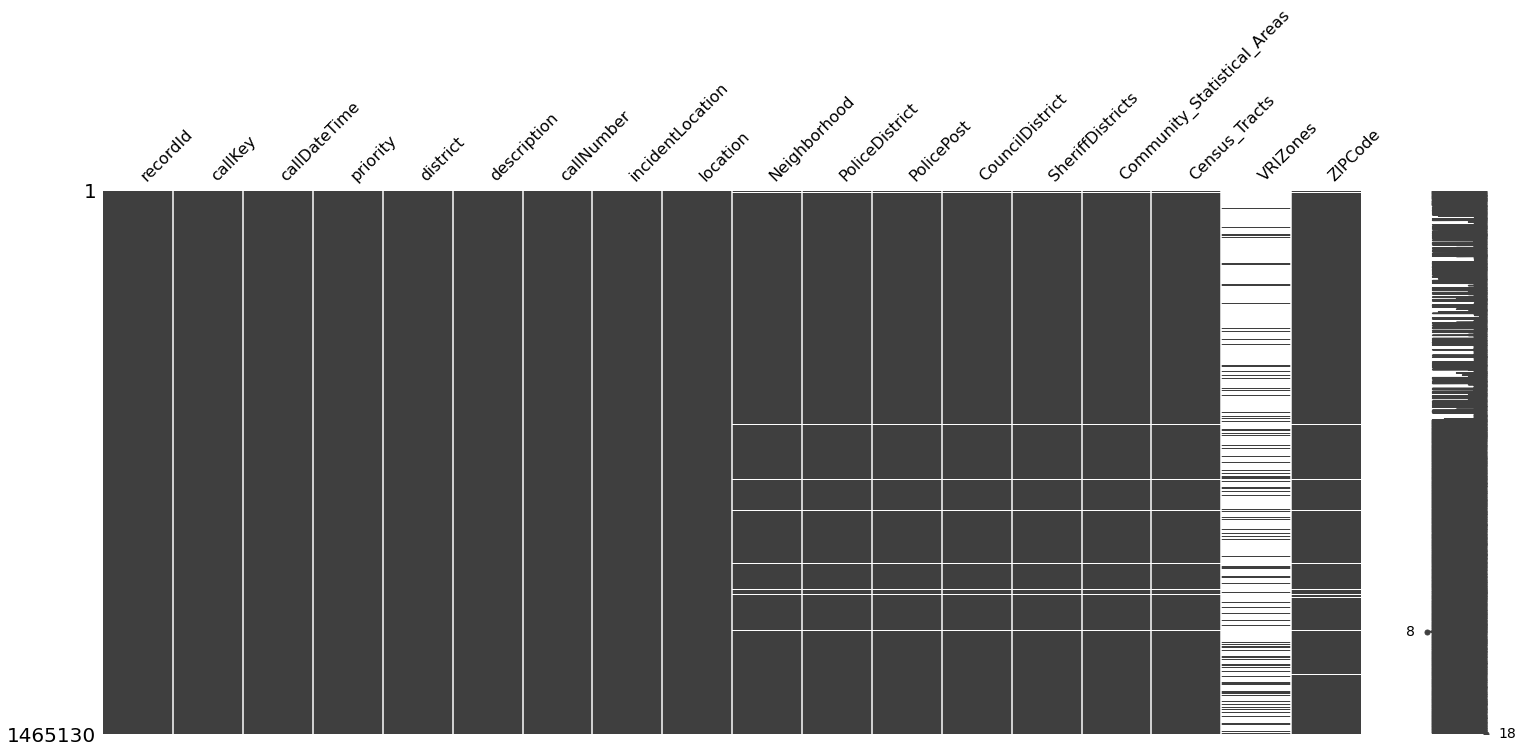

In [ ]:
msno.matrix(df)

In [ ]:
df= df.drop('VRIZones', 1)

In [ ]:
df

,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode
OBJECTID,,,,,,,,,,,,,,,,,
1,8285810,10CC9DA95F732422,2020/09/29 08:10:00,Low,ND,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,21209.0
2,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00,Low,SD,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,21230.0
3,8286082,10CC9DA95F733855,2020/09/29 09:36:00,Low,NE,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,21218.0
4,8290068,10CC9DA95F748561,2020/09/30 09:17:00,Low,SE,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,21224.0
5,8290067,10CC9DA95F748784,2020/09/30 09:26:00,Low,WD,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,21216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465126,8699998,FCC9DA95FEDF022,2020/12/31 10:37:00,Medium,NE,BURGLARY,P203662055,1700 LAKESIDE AV,1700 LAKESIDE AV BALTIMORE MD,Ednor Gardens-Lakeside,Northeastern,412.0,14.0,D4,Northwood,Census Tract 902,21218.0
1465127,8700237,FCC9DA95FEE0A32,2020/12/31 12:27:59,Medium,SD,NARCOTICS,P203662471,200 WARREN AV,200 WARREN AV BALTIMORE MD,Federal Hill,Southern,942.0,11.0,D7,Inner Harbor/Federal Hill,Census Tract 2403,21230.0
1465128,8700611,FCC9DA95FEE1C12,2020/12/31 13:44:00,Low,SW,HIT AND RUN,P203662755,800 COOKS LN,800 COOKS LN BALTIMORE MD,West Hills,Southwestern,823.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2804.01,21229.0


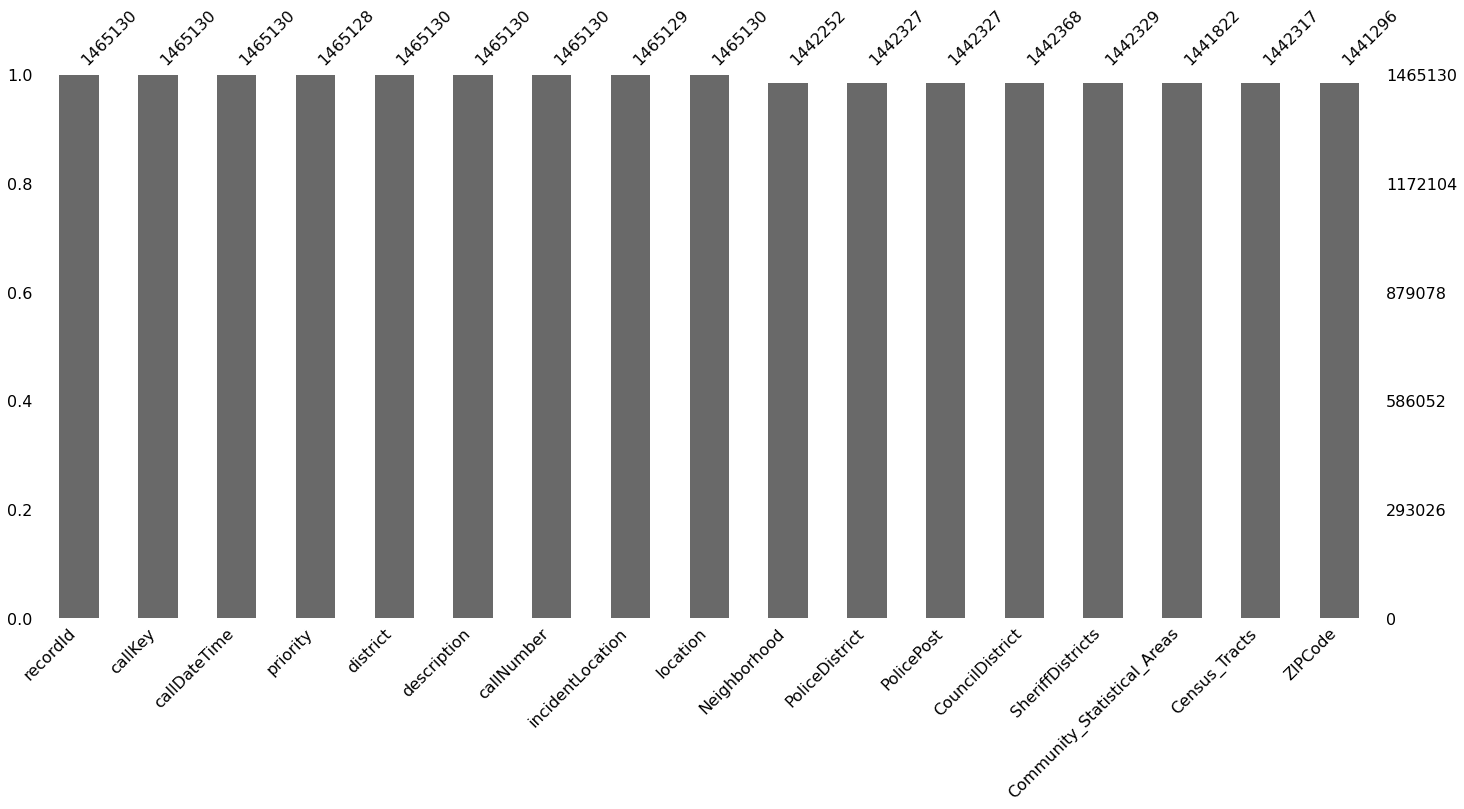

In [ ]:
msno.bar(df)

# District column and police district columns are identical just they have used initals instead of full names (ex- North eastern = NE , SD = southern) 

So Removing the initials column

In [ ]:
df= df.drop('district', 1)
df

,recordId,callKey,callDateTime,priority,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode
OBJECTID,,,,,,,,,,,,,,,,
1,8285810,10CC9DA95F732422,2020/09/29 08:10:00,Low,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,21209.0
2,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00,Low,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,21230.0
3,8286082,10CC9DA95F733855,2020/09/29 09:36:00,Low,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,21218.0
4,8290068,10CC9DA95F748561,2020/09/30 09:17:00,Low,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,21224.0
5,8290067,10CC9DA95F748784,2020/09/30 09:26:00,Low,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,21216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465126,8699998,FCC9DA95FEDF022,2020/12/31 10:37:00,Medium,BURGLARY,P203662055,1700 LAKESIDE AV,1700 LAKESIDE AV BALTIMORE MD,Ednor Gardens-Lakeside,Northeastern,412.0,14.0,D4,Northwood,Census Tract 902,21218.0
1465127,8700237,FCC9DA95FEE0A32,2020/12/31 12:27:59,Medium,NARCOTICS,P203662471,200 WARREN AV,200 WARREN AV BALTIMORE MD,Federal Hill,Southern,942.0,11.0,D7,Inner Harbor/Federal Hill,Census Tract 2403,21230.0
1465128,8700611,FCC9DA95FEE1C12,2020/12/31 13:44:00,Low,HIT AND RUN,P203662755,800 COOKS LN,800 COOKS LN BALTIMORE MD,West Hills,Southwestern,823.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2804.01,21229.0


In [ ]:
group_data= df.groupby(['description']).sum()

In [ ]:
group_data

,recordId,PolicePost,CouncilDistrict,ZIPCode
description,,,,
* ANIMAL CONTROL,8174174,831.0,10.0,21230.0
-OVERCROWDING,7624668,232.0,1.0,21224.0
.,47864795,2553.0,54.0,127294.0
.INVESTIGATE,8402180,111.0,11.0,21202.0
0PENLINE,8431932,623.0,5.0,21215.0
...,...,...,...,...
`,23290488,678.0,21.0,63625.0
`INVEST,7805797,434.0,13.0,21213.0
``,8469904,423.0,3.0,21214.0


In [ ]:
df['description'] = df['description'].str.upper()

In [ ]:
l1= list(df['description'].unique())

In [ ]:
l1.sort(key=len)

In [ ]:
l1

['Y',
 'P',
 ']',
 '.',
 'J',
 '`',
 '3',
 '6',
 'T',
 'H',
 'C',
 '99',
 '56',
 '55',
 '75',
 '54',
 'EP',
 '33',
 '5G',
 '3P',
 '30',
 '31',
 '7C',
 '95',
 '4D',
 '65',
 '27',
 '6J',
 '6D',
 '73',
 '4E',
 '67',
 '69',
 '79',
 '49',
 '61',
 '3N',
 '63',
 '23',
 '4A',
 '24',
 '52',
 '94',
 '2A',
 '6B',
 '87',
 '98',
 '83',
 '28',
 '4B',
 '39',
 '85',
 '58',
 '57',
 '76',
 '68',
 'RP',
 '80',
 '``',
 '93',
 '72',
 '26',
 '7D',
 '2S',
 '66',
 '1Q',
 'DWI',
 'DOA',
 'ATT',
 'SEE',
 '95P',
 '85P',
 'INV',
 '85E',
 'GET',
 'FYI',
 'GUN',
 '20A',
 '56P',
 '60A',
 'ICY',
 '20S',
 'E/P',
 'PAC',
 'EP.',
 'NON',
 'DUI',
 'F/U',
 'CDS',
 'TOW',
 'P/U',
 'REPO',
 'FIRE',
 'INFO',
 'POSS',
 'TRES',
 'BOLO',
 'PROT',
 'ERPO',
 'AWOL',
 'SCAM',
 'LICE',
 'AWAL',
 'LOST',
 'NTFY',
 'GUNS',
 'ODOR',
 'MTFY',
 'UNKN',
 'ININ',
 'TAXI',
 'OPEN',
 'CLSD',
 'POLO',
 'E.P.',
 'TOWD',
 'E,P,',
 'RKSI',
 'I.D.',
 'ODOA',
 'TAGS',
 'ADMI',
 'AMIN',
 'OTHER',
 'FRAUD',
 'DEATH',
 'COURT',
 'LUNCH',
 'CHECK',
 

In [ ]:
punc = """`!()-[]{};:'"\,<>./?@#$%^&*_~"""
  
for i in range(len(l1)):  
    for x in punc:  
        l1[i] = l1[i].replace(x, "")
    if len(l1[i])>4:
      try:
        print(jaccard(l1[i],3))
      except:
        pass
   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [ ]:
l1

['Y',
 'P',
 '',
 '',
 'J',
 '',
 '3',
 '6',
 'T',
 'H',
 'C',
 '99',
 '56',
 '55',
 '75',
 '54',
 'EP',
 '33',
 '5G',
 '3P',
 '30',
 '31',
 '7C',
 '95',
 '4D',
 '65',
 '27',
 '6J',
 '6D',
 '73',
 '4E',
 '67',
 '69',
 '79',
 '49',
 '61',
 '3N',
 '63',
 '23',
 '4A',
 '24',
 '52',
 '94',
 '2A',
 '6B',
 '87',
 '98',
 '83',
 '28',
 '4B',
 '39',
 '85',
 '58',
 '57',
 '76',
 '68',
 'RP',
 '80',
 '',
 '93',
 '72',
 '26',
 '7D',
 '2S',
 '66',
 '1Q',
 'DWI',
 'DOA',
 'ATT',
 'SEE',
 '95P',
 '85P',
 'INV',
 '85E',
 'GET',
 'FYI',
 'GUN',
 '20A',
 '56P',
 '60A',
 'ICY',
 '20S',
 'EP',
 'PAC',
 'EP',
 'NON',
 'DUI',
 'FU',
 'CDS',
 'TOW',
 'PU',
 'REPO',
 'FIRE',
 'INFO',
 'POSS',
 'TRES',
 'BOLO',
 'PROT',
 'ERPO',
 'AWOL',
 'SCAM',
 'LICE',
 'AWAL',
 'LOST',
 'NTFY',
 'GUNS',
 'ODOR',
 'MTFY',
 'UNKN',
 'ININ',
 'TAXI',
 'OPEN',
 'CLSD',
 'POLO',
 'EP',
 'TOWD',
 'EP',
 'RKSI',
 'ID',
 'ODOA',
 'TAGS',
 'ADMI',
 'AMIN',
 'OTHER',
 'FRAUD',
 'DEATH',
 'COURT',
 'LUNCH',
 'CHECK',
 '1011',
 'ASSIT

https://towardsdatascience.com/create-autocorrect-in-python-d1d87679b1